In [77]:
library('urca')
library('zoo')
library('ggplot2')

In [4]:
prices <- read.zoo("../data/0933OS_Code/Chapter 1/JetFuelHedging.csv", sep=",", header=TRUE, format="%Y-%m", FUN= as.yearmon)

In [19]:
head(fortify(prices))

Index,JetFuel,HeatingOil
9 1996,0.682,0.6794
10 1996,0.703,0.7307
11 1996,0.696,0.7261
12 1996,0.693,0.7171
1 1997,0.680,0.7142
2 1997,0.619,0.6081


Don't know how to automatically pick scale for object of type zoo. Defaulting to continuous.
Don't know how to automatically pick scale for object of type zoo. Defaulting to continuous.


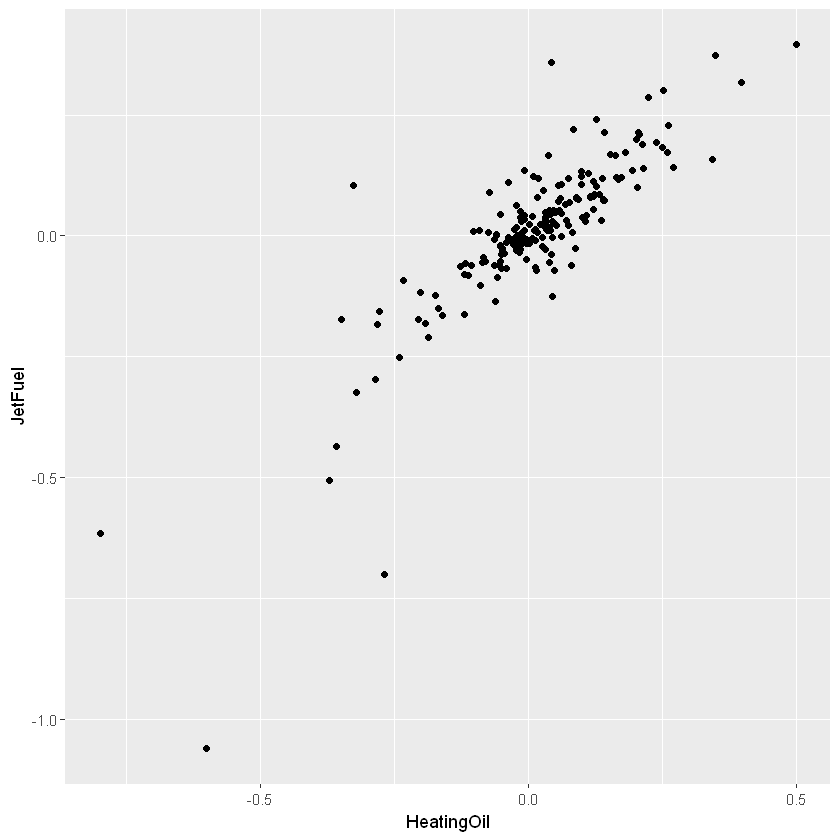

In [27]:
ggplot() +
    geom_point(aes(x=diff(prices$HeatingOil), y=diff(prices$JetFuel))) +
    labs(x='HeatingOil', y='JetFuel')

In [29]:
(simple_mod <- lm(diff(prices$JetFuel) ~ diff(prices$HeatingOil) + 0))


Call:
lm(formula = diff(prices$JetFuel) ~ diff(prices$HeatingOil) + 
    0)

Coefficients:
diff(prices$HeatingOil)  
                 0.8906  


In [30]:
summary(simple_mod)


Call:
lm(formula = diff(prices$JetFuel) ~ diff(prices$HeatingOil) + 
    0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52503 -0.02968  0.00131  0.03237  0.39602 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
diff(prices$HeatingOil)  0.89059    0.03983   22.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0846 on 189 degrees of freedom
Multiple R-squared:  0.7257,	Adjusted R-squared:  0.7242 
F-statistic: 499.9 on 1 and 189 DF,  p-value: < 2.2e-16


Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


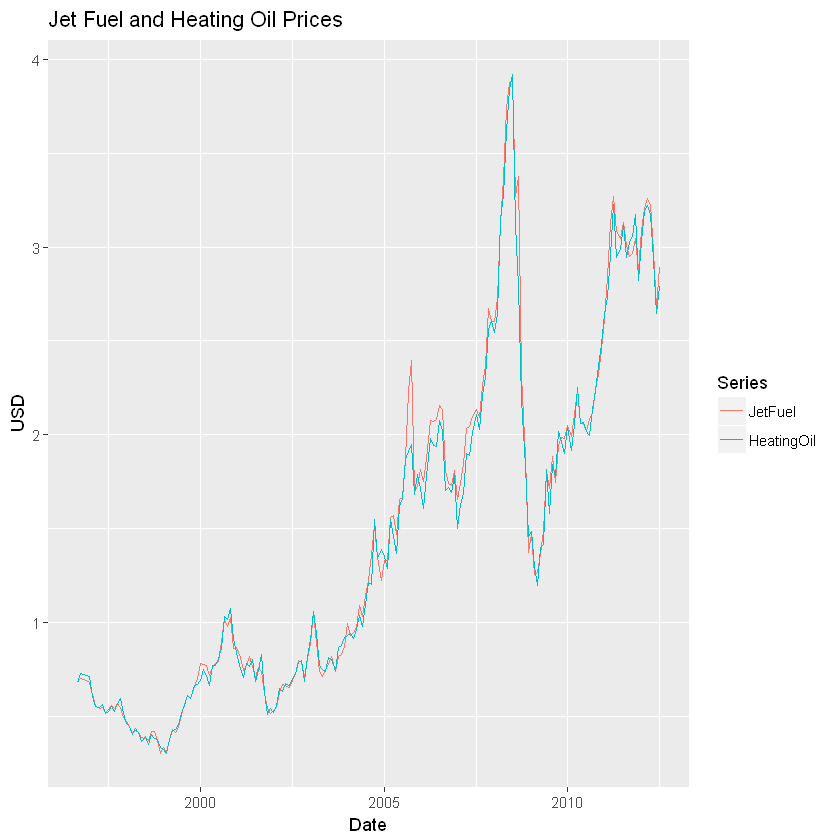

In [39]:
# 난방유 가격과 제트 연료 가격
ggplot(data=fortify(prices, melt=TRUE)) +
    geom_line(aes(x=Index, y=Value, color=Series)) +
    labs(x='Date', y='USD', title='Jet Fuel and Heating Oil Prices')

In [38]:
# Dickey-Fuller 검정을 이용한 단위금(비정상성) 검정 시행
# 검정 통계량이 -1.1335로  1% 유의 수준에서 임계치는 -3.46
# 따라서, 비정상성을 가정한 귀무가설은 1% 유의 수준에서 기각될 수 없다
jf_adf <- ur.df(prices$JetFuel, type='drift')
summary(jf_adf)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06212 -0.05015  0.00566  0.07922  0.38086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.03050    0.02177   1.401  0.16283   
z.lag.1     -0.01441    0.01271  -1.134  0.25845   
z.diff.lag   0.19471    0.07250   2.686  0.00789 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.159 on 186 degrees of freedom
Multiple R-squared:  0.04099,	Adjusted R-squared:  0.03067 
F-statistic: 3.975 on 2 and 186 DF,  p-value: 0.0204


Value of test-statistic is: -1.1335 0.9865 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [51]:
ho_adf <- ur.df(prices$HeatingOil, type='drift')
summary(ho_adf)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78839 -0.06344 -0.00128  0.07418  0.49186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.02815    0.02115   1.331   0.1847  
z.lag.1     -0.01314    0.01263  -1.041   0.2992  
z.diff.lag   0.14419    0.07296   1.976   0.0496 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1534 on 186 degrees of freedom
Multiple R-squared:  0.02418,	Adjusted R-squared:  0.01369 
F-statistic: 2.304 on 2 and 186 DF,  p-value: 0.1027


Value of test-statistic is: -1.041 0.9002 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [52]:
# 검정 통계량 : -8.912
# 따라서 비정상성을 가정한 귀무가설을 기각할 수 있다
mod_static <- summary(lm(JetFuel ~ HeatingOil, data=prices))
error <- residuals(mod_static)
error_cadf <- ur.df(error, type='none')
summary(error_cadf)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19162 -0.03385 -0.00516  0.02879  0.47426 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.74476    0.08357  -8.912 4.46e-16 ***
z.diff.lag  0.12304    0.07264   1.694    0.092 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07107 on 187 degrees of freedom
Multiple R-squared:  0.3417,	Adjusted R-squared:  0.3347 
F-statistic: 48.53 on 2 and 187 DF,  p-value: < 2.2e-16


Value of test-statistic is: -8.912 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [127]:
# 공적분 : 둘 이상의 비정상성 시계열을 선형 결합했을 때 그 결과가 정상성 시계열을 따르는 현상
# 헤지비율 : 0.99020
# 표준오차 : 0.06875
# 오차항 : -0.65540
djf <- diff(prices$JetFuel)
dho <- diff(prices$HeatingOil)
error_lag <- error[-length(error)];names(error_lag) <- error[-1]
mod_ecm <- lm(djf ~ dho + error_lag + 0)
summary(mod_ecm)


Call:
lm(formula = djf ~ dho + error_lag + 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19158 -0.03246  0.00047  0.02288  0.45117 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
dho        0.90020    0.03238  27.798   <2e-16 ***
error_lag -0.65540    0.06614  -9.909   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06875 on 188 degrees of freedom
Multiple R-squared:  0.8198,	Adjusted R-squared:  0.8179 
F-statistic: 427.6 on 2 and 188 DF,  p-value: < 2.2e-16


Don't know how to automatically pick scale for object of type zoo. Defaulting to continuous.
Don't know how to automatically pick scale for object of type zoo. Defaulting to continuous.


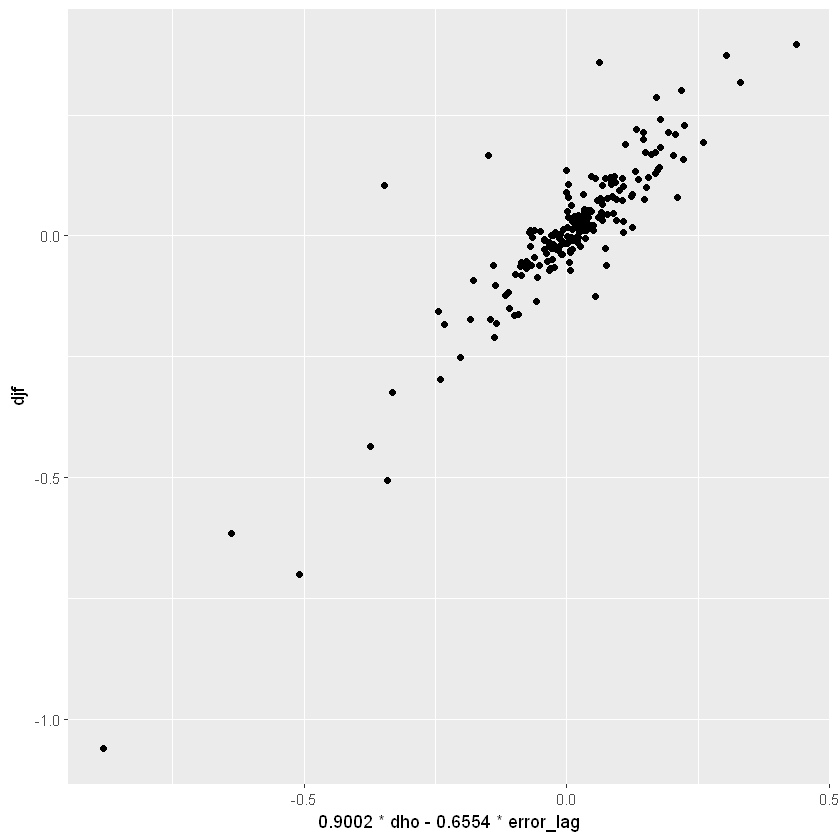

In [138]:
ggplot() +
    geom_point(aes(x=0.90020*dho - 0.65540*error_lag, y=djf))